# Implicit Regularization
This notebook aims to help gain a better understanding of implicit regularization by adding a regularization to the gradient descent loss function and comparing how different learning rates affects the trajectory of the loss function

### Imports 
Import all the libraries needed to define the loss function, the regularization term, and the gradient descent step function as well as plot the loss function

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Define Colormap
Define a colormap for plotting purposes

In [26]:
my_colormap_vals_hex =('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
my_colormap_vals_dec = np.array([int(element,base=16) for element in my_colormap_vals_hex])
r = np.floor(my_colormap_vals_dec/(256*256))
g = np.floor((my_colormap_vals_dec - r *256 *256)/256)
b = np.floor(my_colormap_vals_dec - r * 256 *256 - g * 256)
my_colormap_vals = np.vstack((r,g,b)).transpose()/255.0
my_colormap = ListedColormap(my_colormap_vals)

### Define Loss Function

In [27]:
def loss(phi0, phi1):
    phi1_std = np.exp(-0.5 * (phi0 * phi0)*4.0)
    return 1.0-np.exp(-0.5 * (phi1 * phi1)/(phi1_std * phi1_std))

### Define Loss Function Gradient Function
Define a function that computes the gradient of the loss function

In [28]:
def get_loss_gradient(phi0, phi1):
    delta_phi = 0.00001
    gradient = np.zeros((2,1))
    gradient[0] = (loss(phi0+delta_phi/2.0, phi1) - loss(phi0-delta_phi/2.0, phi1))/delta_phi
    gradient[1] = (loss(phi0, phi1+delta_phi/2.0) - loss(phi0, phi1-delta_phi/2.0))/delta_phi
    return gradient

### Define Plotting Grid
Define a grid of values to plot the loss function

In [29]:
grid_values = np.arange(-0.8,0.5,0.01)
phi0mesh, phi1mesh = np.meshgrid(grid_values, grid_values)
loss_function = np.zeros((grid_values.size, grid_values.size))
for idphi0, phi0 in enumerate(grid_values):
    for idphi1, phi1 in enumerate(grid_values):
        loss_function[idphi0, idphi1] = loss(phi1,phi0)

### Define Gradient Descent Step
Define a function that computes the gradient descent step and updates the trajectory of the loss function based on the output

In [30]:
def grad_descent(start_posn, n_steps, step_size):
    grad_path = np.zeros((2, n_steps+1))
    grad_path[:,0] = start_posn[:,0]
    for c_step in range(n_steps):
        this_grad = get_loss_gradient(grad_path[0,c_step], grad_path[1,c_step])
        grad_path[:,c_step+1] = grad_path[:,c_step] - step_size * this_grad[:,0]
    return grad_path

### Define Loss Plotting Function
Define a function that plots the loss function as well as the trajectory of the loss function, which is computed from the gradient descent step function

In [31]:
def draw_function(phi0mesh, phi1mesh, loss_function, my_colormap, grad_path_tiny_lr=None, grad_path_typical_lr=None):
    fig = plt.figure()
    ax = plt.axes()
    fig.set_size_inches(7,7)
    ax.contourf(phi0mesh, phi1mesh, loss_function, 256, cmap=my_colormap)
    ax.contour(phi0mesh, phi1mesh, loss_function, 20, colors=['#80808080'])
    ax.set_xlabel(r'phi[0]'); ax.set_ylabel(r'phi[1]')

    if grad_path_typical_lr is not None:
        ax.plot(grad_path_typical_lr[0,:], grad_path_typical_lr[1,:],'ro-')
    if grad_path_tiny_lr is not None:
        ax.plot(grad_path_tiny_lr[0,:], grad_path_tiny_lr[1,:],'b-')
    plt.show()

### Define Start Position
Define a coordinate for the start position of the loss function

In [32]:
start_posn = np.zeros((2,1)); start_posn[0,0] = -0.7; start_posn[1,0] = -0.75

### Compute Gradient Descent Step 
Compute the gradient descent step function for very small learning rates and typical sized learning rate to compare their trajectories on the loss function

In [33]:
# Compute the gradient descent with a very small learning rate 
grad_path_tiny_lr = grad_descent(start_posn, 10000, 0.001)

# Compute the gradient descent with a typical sized learning rate
grad_path_typical_lr = grad_descent(start_posn, 100, 0.05)

### Plot Trajectories 
Plot the trajectories of the loss function for both gradient descents with different learning rates where:
- Blue: Gradient Descent with very small learning rate
- Red: Gradient Descent with typical sized learning rate

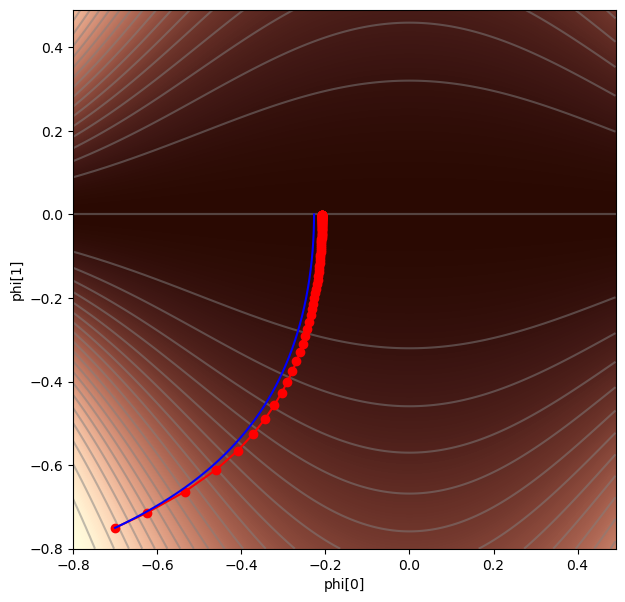

In [34]:
draw_function(phi0mesh, phi1mesh, loss_function, my_colormap, grad_path_tiny_lr, grad_path_typical_lr)

### Define Implicit Regularization Term

In [35]:
def get_reg_term(phi0, phi1, alpha):
  reg_term = (alpha/4)*np.sum(get_loss_gradient(phi0, phi1)**2)

  return reg_term

### Define Modified Loss Function
Define the modified loss function, which is a loss function with the addition of the implicit regularization term

In [36]:
def loss_reg(phi0, phi1, alpha):
    # Define the original loss function
    phi1_std = np.exp(-0.5 * (phi0 * phi0)*4.0)
    loss_out =  1.0-np.exp(-0.5 * (phi1 * phi1)/(phi1_std * phi1_std))

    # Add the regularization term to the original loss function
    loss_out = loss_out + get_reg_term(phi0, phi1,alpha)
    return loss_out 

### Define Modified Loss Gradient Function
Define a function that computes the gradient of the modified loss function

In [37]:
def get_loss_gradient_reg(phi0, phi1,alpha):
    delta_phi = 0.00001
    gradient = np.zeros((2,1))
    gradient[0] = (loss_reg(phi0+delta_phi/2.0, phi1, alpha) - loss_reg(phi0-delta_phi/2.0, phi1, alpha))/delta_phi
    gradient[1] = (loss_reg(phi0, phi1+delta_phi/2.0, alpha) - loss_reg(phi0, phi1-delta_phi/2.0, alpha))/delta_phi
    return gradient


### Compute Regularization Term 
Compute the value of the regularization term for different parameter values for plotting

In [38]:
alpha = 0.1
reg_term = np.zeros((grid_values.size, grid_values.size))
for idphi0, phi0 in enumerate(grid_values):
    for idphi1, phi1 in enumerate(grid_values):
        reg_term[idphi0, idphi1] = get_reg_term(phi1,phi0, alpha)

### Plot Regularization Term

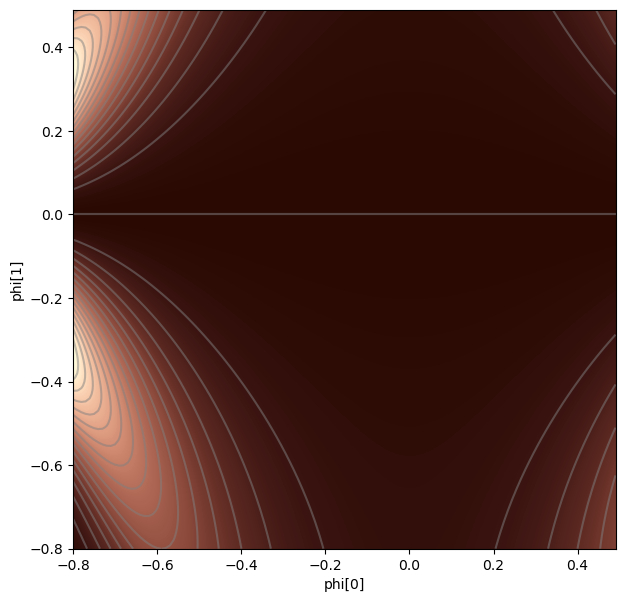

In [39]:
draw_function(phi0mesh, phi1mesh, reg_term, my_colormap)

### Compute Modified Loss Function
Compute the value of the modified loss function for different parameter values for plotting

In [40]:
alpha = 0.1
loss_function_reg = np.zeros((grid_values.size, grid_values.size))
for idphi0, phi0 in enumerate(grid_values):
    for idphi1, phi1 in enumerate(grid_values):
        loss_function_reg[idphi0, idphi1] = loss_reg (phi1,phi0, alpha)

### Plot Modified Loss Function

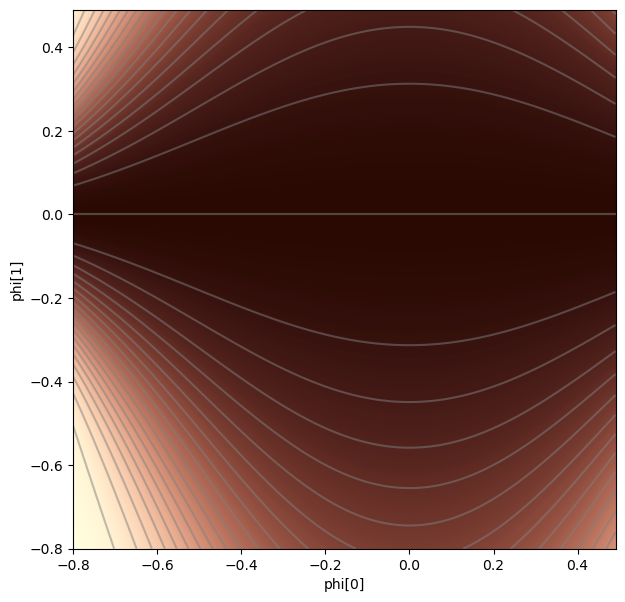

In [41]:
draw_function(phi0mesh, phi1mesh, loss_function_reg, my_colormap)

### Define Gradient Descent Step (Modified Loss Function)
Define a function that computes the gradient descent step for the modified loss function and updates the trajectory of the parameter where: 
- Alpha: step size for the gradient descent
- Alpha reg: step size used to calculate the regularization term

In [42]:
def grad_descent_reg(start_posn, n_steps, alpha, alpha_reg):
    grad_path = np.zeros((2, n_steps+1))
    grad_path[:,0] = start_posn[:,0]
    for c_step in range(n_steps):
        this_grad = get_loss_gradient_reg(grad_path[0,c_step], grad_path[1,c_step],alpha_reg)
        grad_path[:,c_step+1] = grad_path[:,c_step] - alpha * this_grad[:,0]
    return grad_path

### Define Start Position
Define a coordinate for theh start position of the loss function

In [43]:
start_posn = np.zeros((2,1)); start_posn[0,0] = -0.7; start_posn[1,0] = -0.75

### Compute Modified Gradient Descent Step
Compute the modified gradient descent step function for very small learning rates and typical learning rates to compare their trajectories on the loss function

In [44]:
# Compute the modified gradient descent step function with 10000 steps, alpha_reg = 0.05, and a very small learning rate alpha of 0.001
grad_path_tiny_lr = grad_descent_reg(start_posn, 10000, 0.001, 0.05)

# Compute the modified gradient descent step function with 100 steps and a typical learning rate alpha of 0.05
grad_path_typical_lr = grad_descent_reg(start_posn, 100, 0.05, 0.05)

### Plot Trajectories (Modified Loss Function)
Plot the trajectories of the modified loss function for both modified gradient descents with different learning rates where:
- Blue: Gradient Descent with very small learning rate
- Red: Gradient Descent with typical sized learning rate

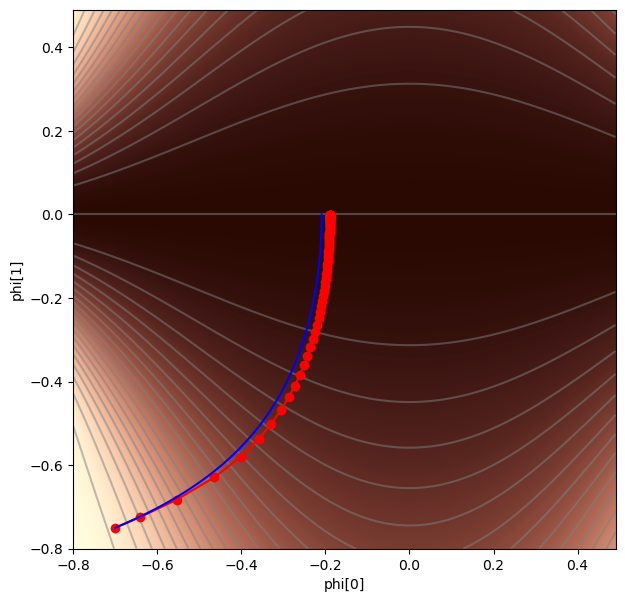

In [45]:
draw_function(phi0mesh, phi1mesh, loss_function_reg, my_colormap, grad_path_tiny_lr, grad_path_typical_lr)